<a href="https://colab.research.google.com/github/maincarey/ML/blob/master/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/sample_data/homes.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


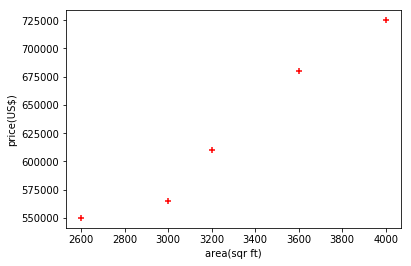

In [0]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [0]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [0]:

price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [0]:
# create object for linear 
# fit the data is traning the data using the data points
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# predict price - price = mx + b  caluculated m and b
#(1) Predict price of a home with area = 3300 sqr ft
reg.predict([[3300]])

array([628715.75342466])

In [0]:
# m in price = mx + b
reg.coef_

array([135.78767123])

In [0]:
# b in price = mx + b
# Y = m * X + b (m is coefficient and b is intercept)
reg.intercept_

180616.43835616432

In [0]:
# (1) Predict price of a home with area = 5000 sqr ft
reg.predict([[5000]])

array([859554.79452055])

In [0]:
# Generate CSV file with list of home price predictions

area_df = pd.read_csv("/content/sample_data/homesinsert.csv")
area_df.head(3)

,area
0,2500
1,4000
2,3300


In [0]:

p = reg.predict(area_df)
p

array([520085.61643836, 723767.12328767, 628715.75342466, 913869.8630137 ,
       506506.84931507])

In [0]:
area_df['prices']=p
area_df

,area,prices
0,2500,520085.616438
1,4000,723767.123288
2,3300,628715.753425
3,5400,913869.863014
4,2400,506506.849315


In [0]:
#p = reg.predict(area_df)
#area_df['prices']=p

In [0]:
area_df.to_csv("prediction.csv")

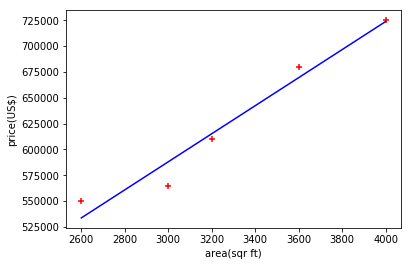

In [0]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')
# (df[['area']]) y predictions
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [0]:
import pickle

In [0]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [0]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [0]:
reg.predict([[5000]])
#print(mp)

array([859554.79452055])